<a href="https://colab.research.google.com/github/zolfaShefreie/data-mining-classification/blob/main/pro2_data_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_excel('./dataset.xls', parse_dates=True)
df.head(3)

,Unnamed: 0,Customer,Agent,SalesAgentEmailID,ContactEmailID,Stage,Product,Close_Value,Created Date,Close Date
0,0,Konex,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255.0,2016-01-04,2016-05-24
1,1,Finjob,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45.0,2016-01-04,2016-11-02
2,2,Kinnamplus,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,NaN,2016-01-06,2016-12-07


In [ ]:
df.columns = ['Index', 'Customer', 'Agent', 'SalesAgentEmailID',
       'ContactEmailID', 'Stage', 'Product', 'Close_Value', 'Created Date',
       'Close Date']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7800 entries, 0 to 7799
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Index              7800 non-null   int64         
 1   Customer           7800 non-null   object        
 2   Agent              7800 non-null   object        
 3   SalesAgentEmailID  7800 non-null   object        
 4   ContactEmailID     7800 non-null   object        
 5   Stage              7800 non-null   object        
 6   Product            7800 non-null   object        
 7   Close_Value        6592 non-null   float64       
 8   Created Date       7800 non-null   datetime64[ns]
 9   Close Date         7800 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 609.5+ KB


In [ ]:
df.isnull().sum()

Index                   0
Customer                0
Agent                   0
SalesAgentEmailID       0
ContactEmailID          0
Stage                   0
Product                 0
Close_Value          1208
Created Date            0
Close Date              0
dtype: int64

In [ ]:
# df[df['days']==0]

In [ ]:
categorical=[var for var in df.columns if df[var].dtype=='O']
categorical

['Customer',
 'Agent',
 'SalesAgentEmailID',
 'ContactEmailID',
 'Stage',
 'Product']

In [ ]:
for var in categorical: 
    
    print(df[var].value_counts())

Hottechi                 188
Kan-code                 184
Condax                   163
Konex                    160
Dontechi                 135
                        ... 
Iselectrics               63
Plusstrip                 62
The New York Inquirer     62
Bioplex                   61
Sumace                    56
Name: Customer, Length: 85, dtype: int64
Darcel Schlecht       666
Vicki Laflamme        406
Anna Snelling         397
Kary Hendrixson       388
Versie Hillebrand     331
Kami Bicknell         317
Zane Levy             313
Jonathan Berthelot    313
Cassey Cress          311
Gladys Colclough      288
Lajuana Vencill       275
Corliss Cosme         273
Markita Hansen        270
Maureen Marcano       255
Marty Freudenburg     251
Donn Cantrell         234
James Ascencio        233
Violet Mclelland      232
Daniell Hammack       227
Moses Frase           222
Niesha Huffines       214
Reed Clapper          202
Boris Faz             185
Cecily Lampkin        181
Hayden Neloms   

In [ ]:
df.pivot_table(index=['Customer', 'ContactEmailID'], aggfunc='size')

Customer          ContactEmailID            
Acme Corporation  cuc@acmecorporation.com       73
Betasoloin        danilo@betasoloin.com         78
Betatech          genie@betatech.com            91
Bioholding        bryan@bioholding.com          95
Bioplex           cassy@bioplex.com             61
                                                ..
Zencorporation    rosalyn@zencorporation.com    65
Zoomit            laveta@zoomit.com             65
Zotware           shella@zotware.com            92
Zumgoity          israel@zumgoity.com           72
dambase           darwin@dambase.com            84
Length: 85, dtype: int64

یه چیز کلی دیده بشه که چند تا معامله بوده و  ...

In [ ]:
df.describe()

,Index,Close_Value
count,7800.000000,6592.000000
mean,3899.500000,1852.915504
std,2251.810383,2197.116613
min,0.000000,41.000000
25%,1949.750000,492.000000
50%,3899.500000,1000.000000
75%,5849.250000,3393.000000
max,7799.000000,30288.000000


این فکر که ممکنه هر کسی که تو معامله بوده روی برد و باخت تاثیری گذاشته باشه برای همین می خوام ببینم از بین این کارمندها تکراری هم هست یا نه

In [ ]:
df.SalesAgentEmailID.unique()

array(['corliss@piedpiper.com', 'rosalina@piedpiper.com',
       'donn@piedpiper.com', 'james@piedpiper.com',
       'lajuana@piedpiper.com', 'zane@piedpiper.com',
       'kary@piedpiper.com', 'darcel@piedpiper.com',
       'garret@piedpiper.com', 'elease@piedpiper.com',
       'daniell@piedpiper.com', 'versie@piedpiper.com',
       'anna@piedpiper.com', 'markita@piedpiper.com',
       'vicki@piedpiper.com', 'gladys@piedpiper.com',
       'wilburn@piedpiper.com', 'violet@piedpiper.com',
       'moses@piedpiper.com', 'rosie@piedpiper.com',
       'cassey@piedpiper.com', 'hayden@piedpiper.com',
       'maureen@piedpiper.com', 'jonathan@piedpiper.com',
       'kami@piedpiper.com', 'reed@piedpiper.com', 'niesha@piedpiper.com',
       'marty@piedpiper.com', 'cecily@piedpiper.com',
       'boris@piedpiper.com'], dtype=object)

در مجموع ۳۰ تا آدم هستند که معاملات ها رو انجام میدن

In [ ]:
len(df.SalesAgentEmailID.unique())

30

تعداد کارمند های یونیکی از طرف مشتری حرف می زنن هم اینان

In [ ]:
len(df.ContactEmailID.unique())

85

هر کدوم از کارمندهای قسمت فروش چقدر سهم داشتن تو معاملات

In [ ]:
df.pivot_table(index=['SalesAgentEmailID'], aggfunc='size')

SalesAgentEmailID
anna@piedpiper.com        397
boris@piedpiper.com       185
cassey@piedpiper.com      311
cecily@piedpiper.com      181
corliss@piedpiper.com     273
daniell@piedpiper.com     227
darcel@piedpiper.com      666
donn@piedpiper.com        234
elease@piedpiper.com      153
garret@piedpiper.com       98
gladys@piedpiper.com      288
hayden@piedpiper.com      174
james@piedpiper.com       233
jonathan@piedpiper.com    313
kami@piedpiper.com        317
kary@piedpiper.com        388
lajuana@piedpiper.com     275
markita@piedpiper.com     270
marty@piedpiper.com       251
maureen@piedpiper.com     255
moses@piedpiper.com       222
niesha@piedpiper.com      214
reed@piedpiper.com        202
rosalina@piedpiper.com    149
rosie@piedpiper.com       142
versie@piedpiper.com      331
vicki@piedpiper.com       406
violet@piedpiper.com      232
wilburn@piedpiper.com     100
zane@piedpiper.com        313
dtype: int64

هر کدوم از این  کارمند هایی که سمت مشتری بودند چقدر سهم داشتن

In [ ]:
df.pivot_table(index=['ContactEmailID'], aggfunc='size')

ContactEmailID
alejandro@initech.com             67
antionette@bluthcompany.com       72
ashlie@sonron.com                 86
belinda@finjob.com               102
benny@treequote.com              117
                                ... 
williemae@zathunicon.com          71
winston@j-texon.com               87
ying@funholding.com              120
yolando@globexcorporation.com     88
zulema@silis.com                  81
Length: 85, dtype: int64

هر کدوم چقدر با هم همکاری داشتن

In [ ]:
df.pivot_table(index=['SalesAgentEmailID', 'ContactEmailID'], aggfunc='size')

SalesAgentEmailID   ContactEmailID               
anna@piedpiper.com  alejandro@initech.com             1
                    antionette@bluthcompany.com       3
                    ashlie@sonron.com                 1
                    belinda@finjob.com                3
                    benny@treequote.com              15
                                                     ..
zane@piedpiper.com  verna@statholdings.com            2
                    winston@j-texon.com               7
                    ying@funholding.com               1
                    yolando@globexcorporation.com     1
                    zulema@silis.com                  2
Length: 1744, dtype: int64

In [ ]:
df.pivot_table(index=['Stage'], aggfunc='size')

Stage
In Progress    2089
Lost           1973
Won            3738
dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)
df.pivot_table(index=['SalesAgentEmailID', 'Stage'], aggfunc='size')

SalesAgentEmailID       Stage      
anna@piedpiper.com      In Progress    112
                        Lost           100
                        Won            185
boris@piedpiper.com     In Progress     57
                        Lost            44
                        Won             84
cassey@piedpiper.com    In Progress     85
                        Lost            75
                        Won            151
cecily@piedpiper.com    In Progress     43
                        Lost            45
                        Won             93
corliss@piedpiper.com   In Progress     81
                        Lost            66
                        Won            126
daniell@piedpiper.com   In Progress     72
                        Lost            55
                        Won            100
darcel@piedpiper.com    In Progress    194
                        Lost           163
                        Won            309
donn@piedpiper.com      Lost            96
                  

In [ ]:
df.pivot_table(index=['ContactEmailID', 'Stage'], aggfunc='size')

ContactEmailID                       Stage      
alejandro@initech.com                In Progress     21
                                     Lost            18
                                     Won             28
antionette@bluthcompany.com          In Progress     28
                                     Lost            17
                                     Won             27
ashlie@sonron.com                    In Progress     24
                                     Lost            20
                                     Won             42
belinda@finjob.com                   In Progress     30
                                     Lost            22
                                     Won             50
benny@treequote.com                  In Progress     25
                                     Lost            32
                                     Won             60
bryan@bioholding.com                 In Progress     27
                                     Lost            25

In [ ]:
df.groupby(['Product']).mean()

,Index,Close_Value
Product,,
GTK 500,3920.631579,11747.428571
GTX Basic,3874.768485,974.621060
GTX Plus Basic,3848.389388,1160.540153
GTX Plus Pro,3914.248260,3306.299584
GTXPro,3943.967914,3162.658159
MG Advanced,3937.755591,2329.598690
MG Special,3888.432377,720.801303


In [ ]:
df.groupby(['Product', 'Stage'])['Close_Value'].mean()

Product         Stage      
GTK 500         In Progress     2396.307692
                Lost             607.500000
                Won            26796.285714
GTX Basic       In Progress     1326.275862
                Lost            1408.835694
                Won              545.414414
GTX Plus Basic  In Progress     1268.308244
                Lost            1197.692308
                Won             1082.183432
GTX Plus Pro    In Progress     1344.198953
                Lost            1227.016393
                Won             5482.870317
GTXPro          In Progress     1610.804196
                Lost            1526.275735
                Won             4811.871985
MG Advanced     In Progress     1510.356643
                Lost            1354.171821
                Won             3382.754065
MG Special      In Progress     1333.502732
                Lost            1260.413793
                Won               55.178322
Name: Close_Value, dtype: float64

In [ ]:
df[df['Product'] == 'GTK 500']

,Index,Customer,Agent,SalesAgentEmailID,ContactEmailID,Stage,Product,Close_Value,Created Date,Close Date
135,135,Warephase,Elease Gluck,elease@piedpiper.com,elisa@warephase.com,In Progress,GTK 500,5169.0,2016-06-08,2016-09-22
319,319,Zoomit,Elease Gluck,elease@piedpiper.com,laveta@zoomit.com,Won,GTK 500,25897.0,2016-12-28,2017-05-24
376,376,Rundofase,Markita Hansen,markita@piedpiper.com,crista@rundofase.com,In Progress,GTK 500,589.0,2017-01-03,2017-03-08
437,437,Kan-code,Markita Hansen,markita@piedpiper.com,kenton@kan-code.com,In Progress,GTK 500,588.0,2017-01-07,2017-09-06
823,823,Xx-holding,Elease Gluck,elease@piedpiper.com,shemeka@xx-holding.com,Won,GTK 500,29220.0,2017-01-27,2017-12-08
887,887,Plexzap,Elease Gluck,elease@piedpiper.com,titus@plexzap.com,Won,GTK 500,24949.0,2017-01-31,2017-08-16
905,905,Finjob,Markita Hansen,markita@piedpiper.com,belinda@finjob.com,Won,GTK 500,24745.0,2017-02-01,2017-09-15
1646,1646,Statholdings,Markita Hansen,markita@piedpiper.com,verna@statholdings.com,In Progress,GTK 500,300.0,2017-03-09,2017-07-18
1691,1691,Betasoloin,Rosalina Dieter,rosalina@piedpiper.com,danilo@betasoloin.com,In Progress,GTK 500,4514.0,2017-03-11,2017-10-22
2253,2253,Cheers,Elease Gluck,elease@piedpiper.com,robbie@cheers.com,Lost,GTK 500,487.0,2017-04-12,2017-09-02


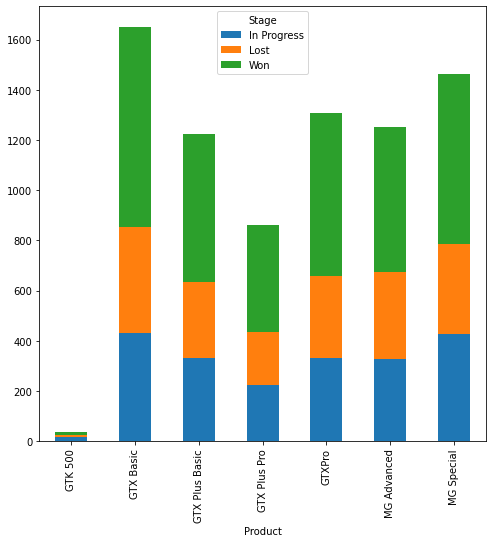

In [ ]:
sd = df.groupby(['Product','Stage'])['Index'].nunique().reset_index()
sd.pivot(index='Product',values='Index',columns='Stage').plot(kind='bar',stacked=True,figsize=(8,8))

In [ ]:
sd

,Product,Stage,Index
0,GTK 500,In Progress,15
1,GTK 500,Lost,9
2,GTK 500,Won,14
3,GTX Basic,In Progress,430
4,GTX Basic,Lost,423
5,GTX Basic,Won,797
6,GTX Plus Basic,In Progress,332
7,GTX Plus Basic,Lost,303
8,GTX Plus Basic,Won,590
9,GTX Plus Pro,In Progress,223


In [ ]:
df.groupby(['Product', 'SalesAgentEmailID', 'Stage']).mean()

Index   Close_Value
Product        SalesAgentEmailID      Stage                                 
GTK 500        corliss@piedpiper.com  Lost         5347.000000   1014.000000
               darcel@piedpiper.com   Lost         7062.000000    493.000000
               elease@piedpiper.com   In Progress  4256.142857   3066.285714
                                      Lost         3980.000000    556.500000
                                      Won          2841.833333  26528.000000
               markita@piedpiper.com  In Progress  2886.400000   1164.250000
                                      Lost         5003.000000    563.500000
                                      Won          2149.333333  27842.666667
               marty@piedpiper.com    In Progress  5838.000000           NaN
               rosalina@piedpiper.com In Progress  3775.000000   2515.500000
                                      Won          5111.400000  26490.400000
GTX Basic      anna@piedpiper.com     In Progress  5716.692308   1125.083333
                                      Lost         3680.125000   1773.846154
                                      Won          3421.857143    541.807692
               boris@piedpiper.com    In Progress  4162.200000   1782.222222
                                      Lost         4230.222222    968.666667
                                      Won          3712.769231    528.000000
               cassey@piedpiper.com   In Progress  4230.266667   1587.090909
                                      Lost         3289.055556    733.875000
                                      Won          3987.593750    560.555556
               cecily@piedpiper.com   In Progress  5386.000000    812.000000
                                      Lost         2726.000000   1290.000000
                                      Won          3616.000000    540.000000
               corliss@piedpiper.com  In Progress  3337.800000   1181.937500
                                      Lost         4035.187500   1307.642857
                                      Won          3625.250000    546.916667
               daniell@piedpiper.com  In Progress  3310.555556    821.750000
                                      Lost         3687.400000    992.600000
                                      Won          3117.250000    544.500000
               darcel@piedpiper.com   In Progress  5926.812500   1548.625000
                                      Lost         3013.000000   1310.400000
                                      Won          3623.125000    562.920000
               donn@piedpiper.com     Lost         3965.045455   1674.888889
                                      Won          3262.552632    550.241379
               elease@piedpiper.com   In Progress  3687.833333   1196.000000
                                      Lost         2150.000000    618.666667
                                      Won          4520.538462    540.272727
               garret@piedpiper.com   Lost         2999.250000   1399.714286
                                      Won          3163.615385    506.750000
               gladys@piedpiper.com   In Progress  4565.636364   1217.000000
                                      Lost         3853.083333   1058.363636
                                      Won          3212.909091    568.300000
               james@piedpiper.com    In Progress  3578.000000   1310.625000
                                      Lost         3787.470588   1607.714286
                                      Won          3826.419355    522.681818
               jonathan@piedpiper.com In Progress  5926.025641   1154.916667
                                      Lost         3607.484848   1583.785714
                                      Won          3561.714286    551.070175
               kami@piedpiper.com     In Progress  3227.212121    808.107143
                                      Lost         3663.153846   1961.647059
                                      Won          35

In [ ]:
df['Created Date'][1].day_name()

'Monday'

In [ ]:
df['Created Date Day'] =pd.DatetimeIndex(df['Created Date']).day_name()

In [ ]:
df['Close Date Day'] =pd.DatetimeIndex(df['Close Date']).day_name()

In [ ]:
df.pivot_table(index=['Created Date Day', 'Stage'], aggfunc='size')

Created Date Day  Stage      
Friday            In Progress    309
                  Lost           272
                  Won            537
Monday            In Progress    293
                  Lost           271
                  Won            530
Saturday          In Progress    283
                  Lost           255
                  Won            550
Sunday            In Progress    295
                  Lost           298
                  Won            557
Thursday          In Progress    280
                  Lost           263
                  Won            535
Tuesday           In Progress    303
                  Lost           303
                  Won            499
Wednesday         In Progress    326
                  Lost           311
                  Won            530
dtype: int64

In [ ]:
df.pivot_table(index=['Close Date Day', 'Stage'], aggfunc='size')

Close Date Day  Stage      
Friday          In Progress    303
                Lost           271
                Won            554
Monday          In Progress    278
                Lost           265
                Won            521
Saturday        In Progress    289
                Lost           276
                Won            517
Sunday          In Progress    301
                Lost           331
                Won            534
Thursday        In Progress    290
                Lost           294
                Won            546
Tuesday         In Progress    318
                Lost           278
                Won            528
Wednesday       In Progress    310
                Lost           258
                Won            538
dtype: int64

In [ ]:
df['Created Date month'] =pd.DatetimeIndex(df['Created Date']).month

In [ ]:
df['Close Date month'] = pd.DatetimeIndex(df['Created Date']).month

In [ ]:
df.pivot_table(index=['Created Date month', 'Stage'], aggfunc='size')

Created Date month  Stage      
1                   In Progress    151
                    Lost           179
                    Won            303
2                   In Progress    184
                    Lost           166
                    Won            291
3                   In Progress    195
                    Lost           171
                    Won            287
4                   In Progress    169
                    Lost           152
                    Won            299
5                   In Progress    169
                    Lost           157
                    Won            322
6                   In Progress    163
                    Lost           161
                    Won            308
7                   In Progress    191
                    Lost           168
                    Won            325
8                   In Progress    162
                    Lost           166
                    Won            326
9                   In Progress 

In [ ]:
df['Created Date Year'] =pd.DatetimeIndex(df['Created Date']).year
df.head(3)

,Index,Customer,Agent,SalesAgentEmailID,ContactEmailID,Stage,Product,Close_Value,Created Date,Close Date,Created Date Day,Close Date Day,Created Date month,Close Date month,Created Date Year
0,0,Konex,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255.0,2016-01-04,2016-05-24,Monday,Tuesday,1,1,2016
1,1,Finjob,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45.0,2016-01-04,2016-11-02,Monday,Wednesday,1,1,2016
2,2,Kinnamplus,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,NaN,2016-01-06,2016-12-07,Wednesday,Wednesday,1,1,2016


In [ ]:
df['Close Date Year'] =pd.DatetimeIndex(df['Close Date']).year

In [ ]:
df.pivot_table(index=['Created Date Year', 'Stage'], aggfunc='size')

Created Date Year  Stage      
2016               In Progress      53
                   Lost             43
                   Won             227
2017               In Progress    1536
                   Lost           1930
                   Won            3511
2018               In Progress     500
dtype: int64

In [ ]:
df.pivot_table(index=['Close Date Year', 'Stage'], aggfunc='size')

Close Date Year  Stage      
2016             In Progress      45
                 Lost             37
                 Won             177
2017             In Progress     682
                 Lost            852
                 Won            1556
2018             In Progress     588
                 Lost            540
                 Won            1032
2019             In Progress     774
                 Lost            544
                 Won             973
dtype: int64

In [ ]:
df.pivot_table(index=['Created Date Year','Close Date Year', 'Stage'], aggfunc='size')

Created Date Year  Close Date Year  Stage      
2016               2016             In Progress      45
                                    Lost             37
                                    Won             177
                   2017             In Progress       8
                                    Lost              6
                                    Won              50
2017               2017             In Progress     674
                                    Lost            846
                                    Won            1506
                   2018             In Progress     424
                                    Lost            540
                                    Won            1032
                   2019             In Progress     438
                                    Lost            544
                                    Won             973
2018               2018             In Progress     164
                   2019             In Progress     336


In [ ]:
df['days'] = (df['Close Date'] - df['Created Date'])/np.timedelta64(1,'D')
type(df['days'][0])

numpy.float64

In [ ]:
df.groupby(['Product', 'Created Date Year', 'Stage'])['days'].mean()

Product         Created Date Year  Stage      
GTK 500         2016               In Progress    106.000000
                                   Won            147.000000
                2017               In Progress    470.071429
                                   Lost           377.111111
                                   Won            370.384615
GTX Basic       2016               In Progress    134.866667
                                   Lost           147.090909
                                   Won            134.614035
                2017               In Progress    334.953416
                                   Lost           339.548544
                                   Won            315.913514
                2018               In Progress    268.462366
GTX Plus Basic  2016               In Progress    109.571429
                                   Lost           107.714286
                                   Won            135.815789
                2017               In 

In [ ]:
df.groupby(['Product', 'Close Date Year', 'Stage'])['days'].mean()

Product         Close Date Year  Stage      
GTK 500         2016             In Progress    106.000000
                2017             In Progress    165.500000
                                 Lost           101.500000
                                 Won            192.666667
                2018             In Progress    276.000000
                                 Lost           217.000000
                                 Won            294.250000
                2019             In Progress    727.285714
                                 Lost           692.750000
                                 Won            657.250000
GTX Basic       2016             In Progress     94.166667
                                 Lost           110.777778
                                 Won            102.681818
                2017             In Progress    140.087838
                                 Lost           138.774725
                                 Won            134.932927
           

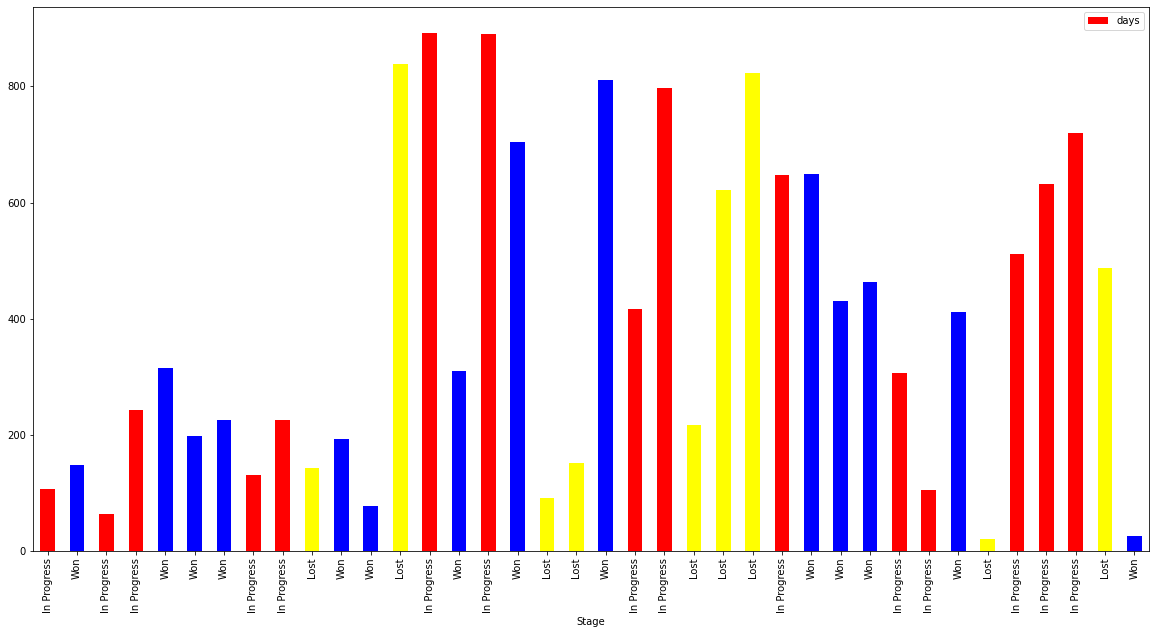

In [ ]:
colors = {'In Progress':'red', 'Lost':'yellow', 'Won':'blue'}
df[df['Product']=='GTK 500'].sort_values('Created Date').plot.bar(x='Stage', y='days', figsize=(20, 10), color=df[df['Product']=='GTK 500']['Stage'].map(colors))

In [ ]:
df.groupby(['Customer', 'Created Date Year', 'Stage'])['days'].mean()

Customer                      Created Date Year  Stage      
Acme Corporation              2016               Won             76.000000
                              2017               In Progress    384.882353
                                                 Lost           256.000000
                                                 Won            386.033333
                              2018               In Progress    261.000000
Betasoloin                    2016               Won            170.000000
                              2017               In Progress    388.300000
                                                 Lost           250.866667
                                                 Won            382.428571
                              2018               In Progress    274.666667
Betatech                      2016               Lost            22.000000
                                                 Won            187.333333
                              2017     

In [ ]:
df[df['Stage'] == "Won"].groupby(['Product', 'Created Date Year'])['Close_Value'].mean()

Product         Created Date Year
GTK 500         2016                 25897.000000
                2017                 26865.461538
GTX Basic       2016                   548.000000
                2017                   545.204545
GTX Plus Basic  2016                  1062.424242
                2017                  1083.559072
GTX Plus Pro    2016                  5489.619048
                2017                  5482.435583
GTXPro          2016                  4748.730769
                2017                  4815.072125
MG Advanced     2016                  3406.230769
                2017                  3381.444206
MG Special      2016                    54.270270
                2017                    55.241121
Name: Close_Value, dtype: float64

In [ ]:
df[df['Stage'] == "Won"].groupby(['Product', 'Close Date Year'])['Close_Value'].mean()

Product         Close Date Year
GTK 500         2017               26619.333333
                2018               28304.000000
                2019               25554.000000
GTX Basic       2016                 547.750000
                2017                 545.151852
                2018                 543.968254
                2019                 546.916168
GTX Plus Basic  2016                1065.291667
                2017                1078.500000
                2018                1075.442857
                2019                1098.751938
GTX Plus Pro    2016                5398.307692
                2017                5574.731034
                2018                5390.647059
                2019                5450.528736
GTXPro          2016                4702.550000
                2017                4791.252336
                2018                4804.371069
                2019                4865.239726
MG Advanced     2016                3400.347826
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


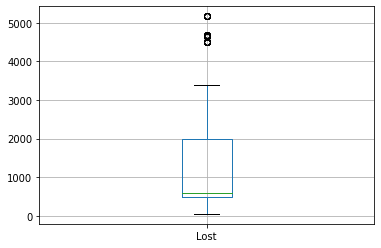

In [ ]:
box_df_1 = pd.DataFrame({'Lost': df[df['Product'] == 'MG Advanced'][df['Stage']=='Lost']['Close_Value'].to_list()})
box_df_1.boxplot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


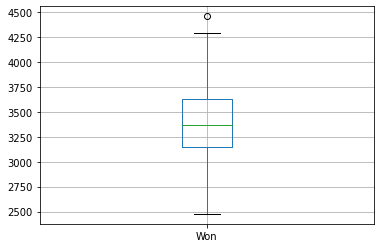

In [ ]:
box_df_1 = pd.DataFrame({'Won': df[df['Product'] == 'MG Advanced'][df['Stage']=='Won']['Close_Value'].to_list()})
box_df_1.boxplot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


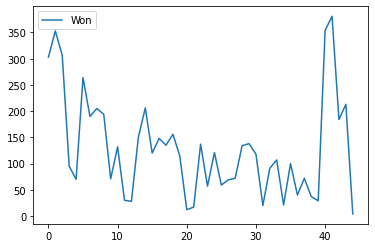

In [ ]:
box_df_3 = pd.DataFrame({'Won': df[df['Product'] == 'MG Special'][df['Created Date Year']==2016]
                         [df['Stage']=='Won']['days'].to_list()})
box_df_3.plot()

(10, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


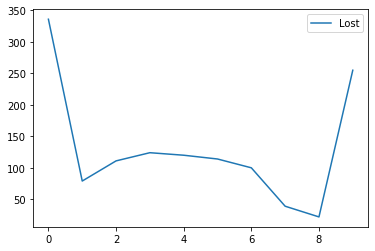

In [ ]:
box_df_4 = pd.DataFrame({'Lost': df[df['Product'] == 'MG Special'][df['Created Date Year']==2016]
                         [df['Stage']=='Lost']['days'].to_list()})
print(box_df_4.shape)
box_df_4.plot()

In [ ]:
df['Product'].unique()

array(['GTX Plus Basic', 'MG Special', 'MG Advanced', 'GTX Basic',
       'GTXPro', 'GTX Plus Pro', 'GTK 500'], dtype=object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


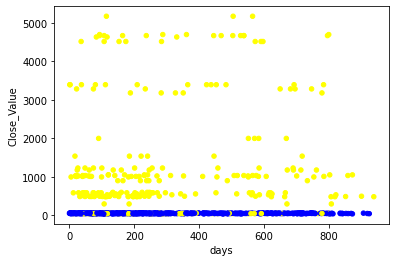

In [ ]:
df[df['Stage']!= 'In Progress'][df['Product'] == 'MG Special'].plot.scatter(x='days', y='Close_Value', 
                                                                            c=df[df['Stage']!= 'In Progress'][df['Product'] == 'MG Special']['Stage'].map(colors))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


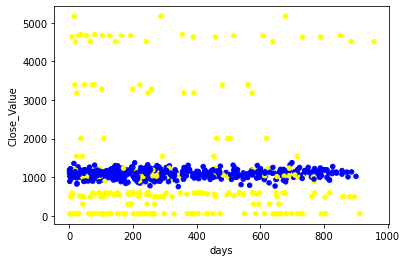

In [ ]:
df[df['Stage']!= 'In Progress'][df['Product'] == 'GTX Plus Basic'].plot.scatter(x='days', y='Close_Value', 
                                                                            c=df[df['Stage']!= 'In Progress'][df['Product'] == 'GTX Plus Basic']['Stage'].map(colors))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


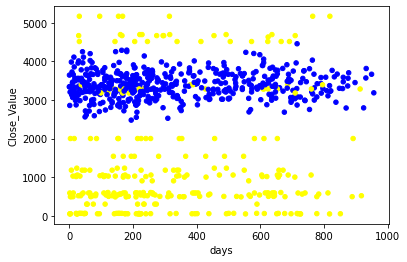

In [ ]:
df[df['Stage']!= 'In Progress'][df['Product'] == 'MG Advanced'].plot.scatter(x='days', y='Close_Value', 
                                                                            c=df[df['Stage']!= 'In Progress'][df['Product'] == 'MG Advanced']['Stage'].map(colors))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


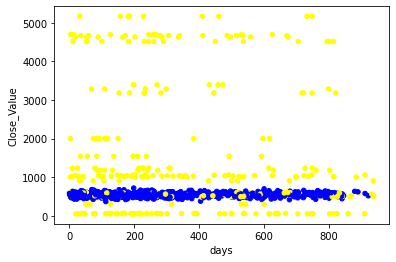

In [ ]:
df[df['Stage']!= 'In Progress'][df['Product'] == 'GTX Basic'].plot.scatter(x='days', y='Close_Value', 
                                                                            c=df[df['Stage']!= 'In Progress'][df['Product'] == 'GTX Basic']['Stage'].map(colors))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


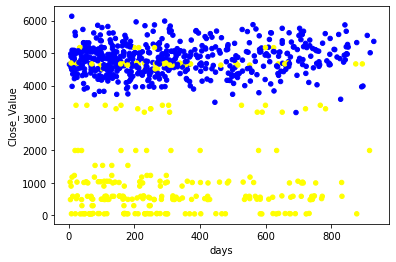

In [ ]:
df[df['Stage']!= 'In Progress'][df['Product'] == 'GTXPro'].plot.scatter(x='days', y='Close_Value', 
                                                                            c=df[df['Stage']!= 'In Progress'][df['Product'] == 'GTXPro']['Stage'].map(colors))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


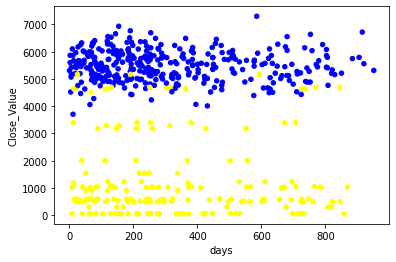

In [ ]:
df[df['Stage']!= 'In Progress'][df['Product'] == 'GTX Plus Pro'].plot.scatter(x='days', y='Close_Value', 
                                                                            c=df[df['Stage']!= 'In Progress'][df['Product'] == 'GTX Plus Pro']['Stage'].map(colors))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


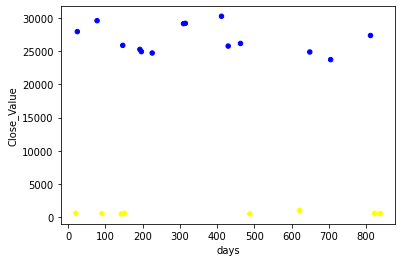

In [ ]:
df[df['Stage']!= 'In Progress'][df['Product'] == 'GTK 500'].plot.scatter(x='days', y='Close_Value', 
                                                                            c=df[df['Stage']!= 'In Progress'][df['Product'] == 'GTK 500']['Stage'].map(colors))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


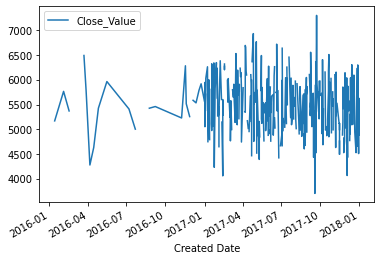

In [ ]:
df[df['Stage'] == 'Won'][df['Product'] == 'GTX Plus Pro'].plot.line(x='Created Date', y='Close_Value')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


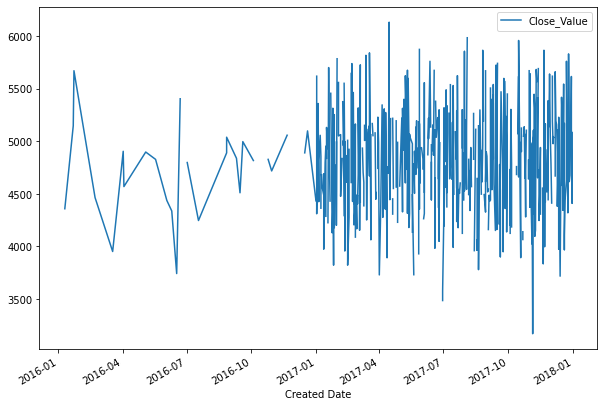

In [ ]:
df[df['Product'] == 'GTXPro'][df['Stage'] == 'Won'].plot.line(x='Created Date', y='Close_Value', figsize=(10, 7))

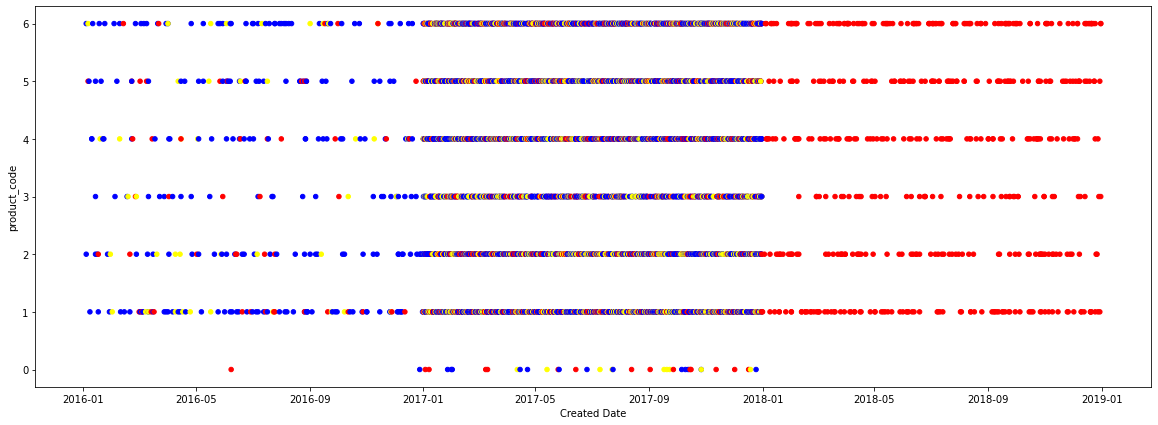

In [ ]:
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()
df['product_code'] = labelEncoder.fit_transform(df['Product'])
df.plot.scatter(x='Created Date', y='product_code', c=df['Stage'].map(colors), figsize=(20, 7))

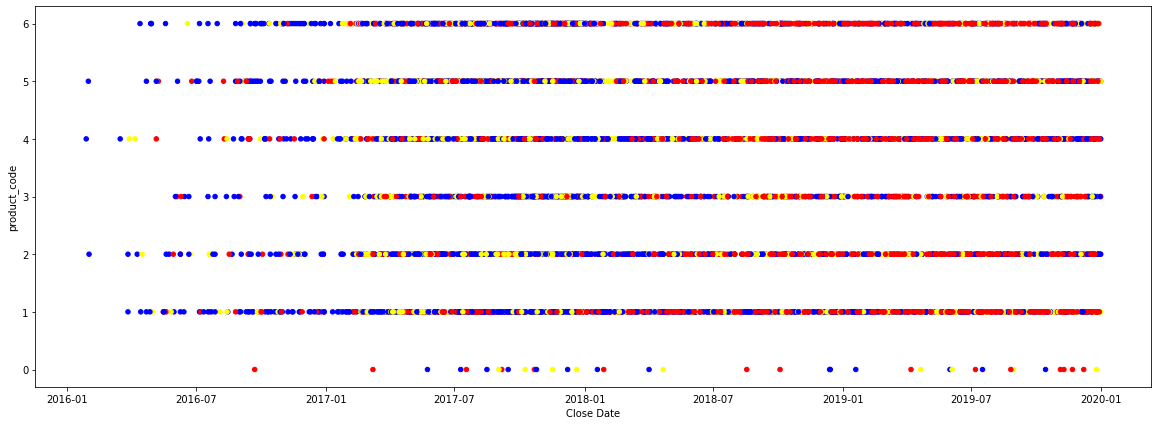

In [ ]:
df.plot.scatter(x='Close Date', y='product_code', c=df['Stage'].map(colors), figsize=(20, 7))

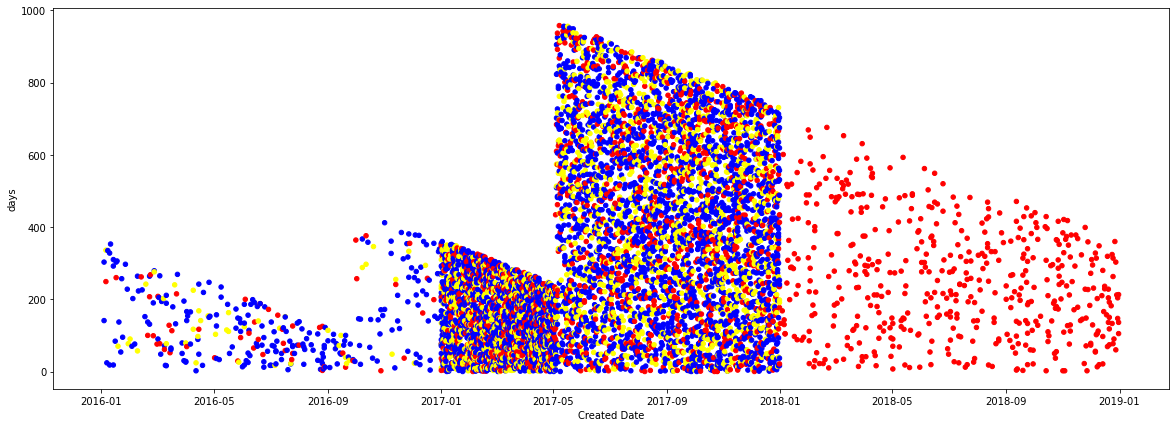

In [ ]:
df.plot.scatter(x='Created Date', y='days', c=df['Stage'].map(colors), figsize=(20, 7))

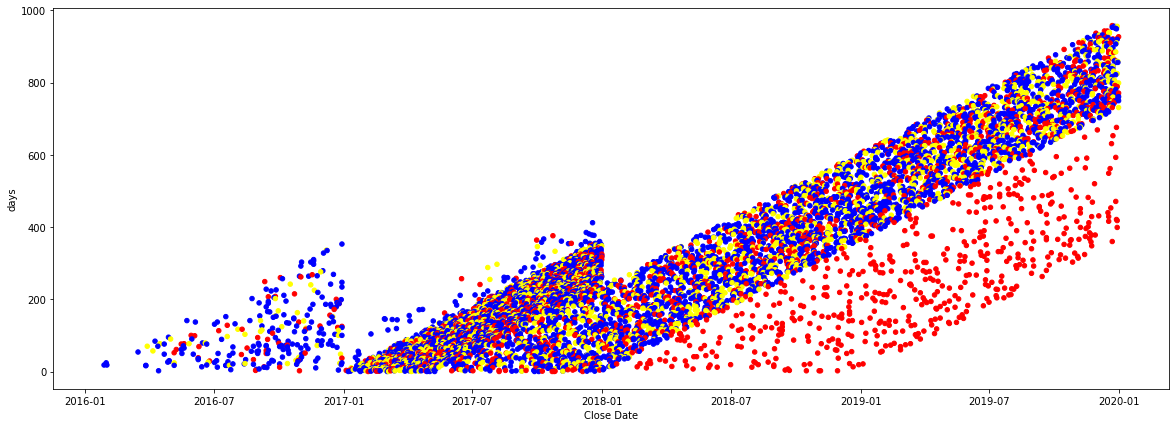

In [ ]:
df.plot.scatter(x='Close Date', y='days', c=df['Stage'].map(colors), figsize=(20, 7))

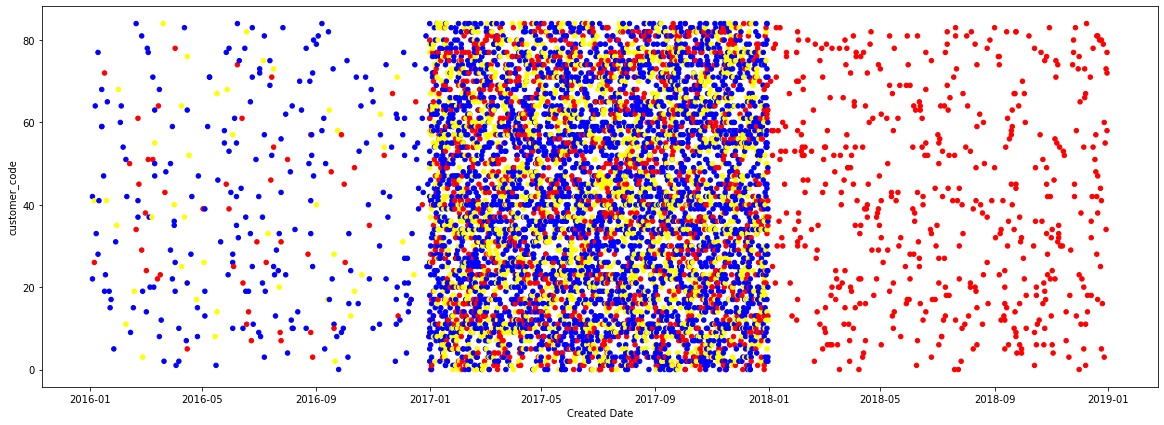

In [ ]:
df['customer_code'] = labelEncoder.fit_transform(df['Customer'])
df.plot.scatter(x='Created Date', y='customer_code', c=df['Stage'].map(colors), figsize=(20, 7))

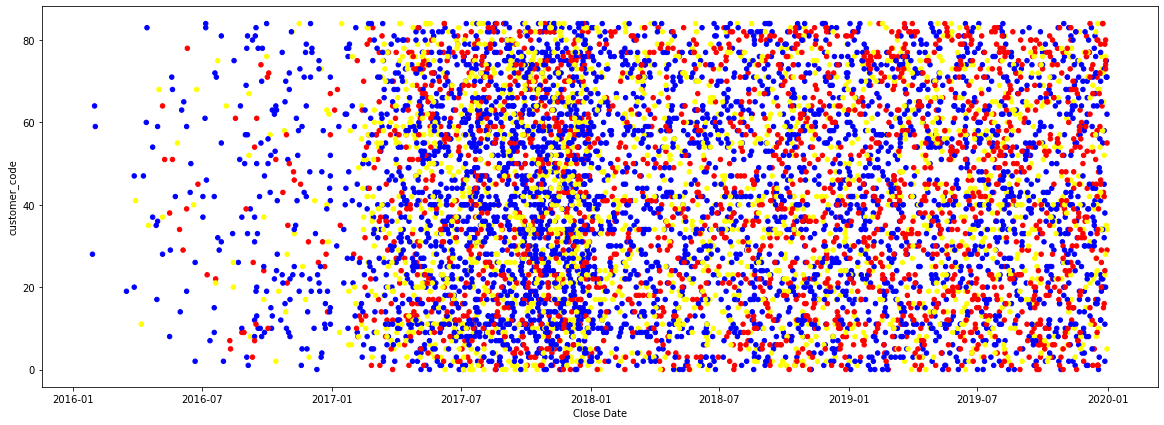

In [ ]:
df.plot.scatter(x='Close Date', y='customer_code', c=df['Stage'].map(colors), figsize=(20, 7))

In [ ]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

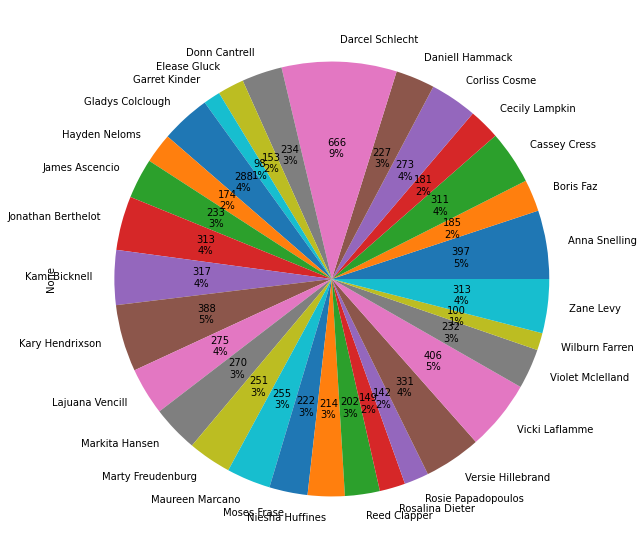

In [ ]:
df.groupby('Agent').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10}, figsize=(10, 10))

In [ ]:
def label_won_function(val):
    return f'{val / 100 * len(df[df["Stage"]=="Won"]):.0f}\n{val:.0f}%'

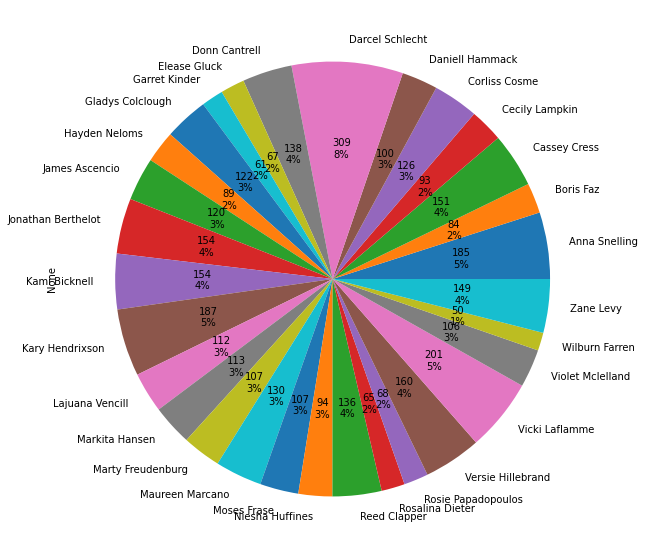

In [ ]:
df[df['Stage']=="Won"].groupby('Agent').size().plot(kind='pie', autopct=label_won_function, textprops={'fontsize': 10}, figsize=(10, 10))

In [ ]:
def label_lost_function(val):
    return f'{val / 100 * len(df[df["Stage"]=="Lost"]):.0f}\n{val:.0f}%'

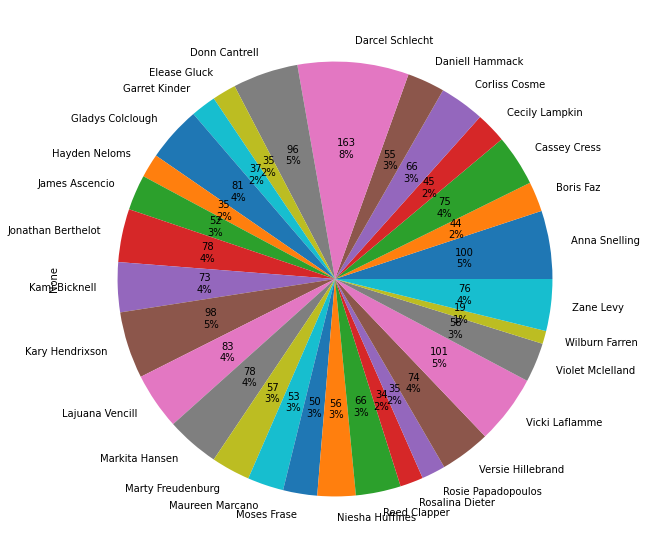

In [ ]:
df[df['Stage']=="Lost"].groupby('Agent').size().plot(kind='pie', autopct=label_lost_function, textprops={'fontsize': 10}, figsize=(10, 10))